In [1]:
# Set Working Directory
import os
os.chdir("D:/Eduvisor/Project/Project 2/Python Code")

In [2]:
#Check current workig directory
os.getcwd()

'D:\\Eduvisor\\Project\\Project 2\\Python Code'

In [3]:
# Import Libraries
#Import libraries
#We are importing all the libraries, which will be used in our model training.

import gc
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.ensemble import  RandomForestClassifier 
from sklearn.model_selection import  train_test_split , GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [4]:
# Load CSV data
test_data = pd.read_csv("test.csv",sep = ',')
train_data = pd.read_csv("train.csv",sep = ',')

In [5]:
test_data

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


In [6]:
train_data

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [7]:
# Getting the number of variables and observations in test_data
test_data.shape

(200000, 201)

In [8]:
# Getting the number of variables and observations in train_data
train_data.shape

(200000, 202)

In [9]:
# Getting first 10 rows of train dataset
train_data.head(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [10]:
# Getting first 10 rows of test dataset
test_data.head(10)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
5,test_5,5.9862,-2.2913,8.6058,7.0685,14.2465,-8.6761,4.2467,14.7632,1.8790,...,-2.1115,7.1178,-0.4249,8.8781,14.9438,-2.2151,-6.0233,9.8117,17.1127,10.8240
6,test_6,8.4624,-6.1065,7.3603,8.2627,12.0104,-7.2073,4.1670,13.0809,-4.3004,...,12.3609,6.8661,4.0971,8.8484,17.5010,0.0295,7.7443,9.1509,18.4736,5.1499
7,test_7,17.3035,-2.4212,13.3989,8.3998,11.0777,9.6449,5.9596,17.8477,-4.8068,...,4.4676,4.4214,0.9303,1.4994,15.2648,-1.7931,6.5316,10.4855,23.4631,0.7283
8,test_8,6.9856,0.8402,13.7161,4.7749,8.6784,-13.7607,4.3386,14.5843,2.5883,...,-3.4657,7.8754,2.4698,-0.0362,16.7144,0.1221,-1.4328,9.9207,16.9865,-3.3304
9,test_9,10.3811,-6.9348,14.6690,9.0941,11.9058,-10.8018,3.4508,20.2816,-1.4112,...,1.8052,11.0723,0.8907,4.7680,15.1425,0.6075,-4.4447,9.5788,15.8146,9.3457


In [11]:
#Unique Values in target column in train_dataset
train_data['target'].unique()

array([0, 1], dtype=int64)

# Datatype

In [12]:
#We will check the datatype of all the feaures in both train and test.
pd.DataFrame(train_data.dtypes).transpose()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [13]:
pd.DataFrame(test_data.dtypes).transpose()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


# Missing Values

In [14]:
def missingcount(count, samples):
        """
        :rtype: object
        """ 
        return (int(count) /samples) * 100
    
def missingPercent(df):
        """
        This Mehtod will return  mising value in respect to perticular feature
        :rtype: object|
        """ 
        count_df = pd.DataFrame(df.isnull().sum(axis=0).reset_index())
        count_df.columns = ['FEATURE', 'MISSING_COUNT']
        count_df["MISSING_%"] = count_df["MISSING_COUNT"].map(lambda x: missingcount(x, df.shape[0] ))
        return count_df.set_index('FEATURE').T

In [15]:
# Training set : Missing Values in training data
missingPercent(train_data) 

FEATURE,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
MISSING_COUNT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MISSING_%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Testing : Missing Values in test data
missingPercent(test_data)

FEATURE,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
MISSING_COUNT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MISSING_%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
train_data.describe() #Pandas describe funcation will help in getting general statistics about the dataset. Like Min, max STD and count etc.

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [18]:
test_data.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


-  Standard Deviation is relatively large for both train and test set.
-  Max, Min and STD are quite close in both train and test data set.
-  Min is distibuted over the large number of range.

# Data Visualization

In [19]:
#Visualization will help us to understand distribution. It's most important part of EDA. 
# Calculate percentage classe
def sample_percentage_per_class(label, values, title="Target Classes Percentage"):
    trace=go.Pie(labels=label, values=values) 
    layout=go.Layout(title=title, height=600, margin=go.Margin(l=0, r=200, b=100, t=100, pad=4))   # Margins - Left, Right, Top Bottom, Padding)
    fig=go.Figure(data=[trace], layout=layout)
    iplot(fig)

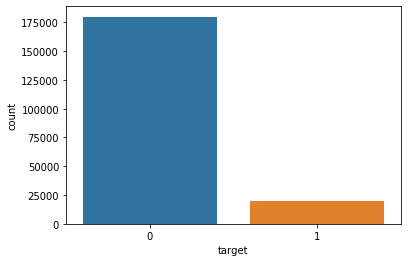

In [20]:
sns.countplot(x='target',data=train_data)

#This is clearly showing that we are working or we have highly imbalanced dataset.

Histograms :
A histogram is a plot that lets us discover and show the underlying frequency distribution.

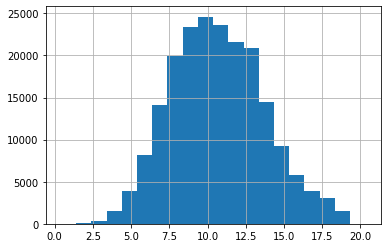

In [21]:
train_data.var_0.hist(bins=20) # Hsitogram for distribution of Var0 variables

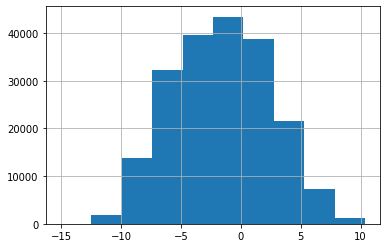

In [22]:
train_data.var_1.hist() # Hsitogram for distribution of Var1_ variables

## Data Relationships

Visualization of data relationship, will help us to understand the degree of correlation between features and the dependencies. 
With the help of scatterplot and heatmap we can show the relationship of features.

In [23]:
# Compute the Correlation matrix
corr=train_data.iloc[:,:20].corr()

In [24]:
corr # Correlation matrix of train data

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,-0.042805,-0.002213,0.022993,-0.069489,-0.055156,-0.006332,0.017283,0.008117,0.000864
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,0.000355,0.003468,-0.001996,-0.002717,-0.004584,-0.000043,0.001112,-0.001664
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,-0.000832,0.002875,0.004778,-0.001977,-0.001303,-0.001544,0.004946,-0.002481,-0.001180
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,-0.001932,-0.000474,0.005180,-0.003781,-0.008795,-0.002627,0.004063,0.000102,0.000841
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,-0.000826,-0.000897,0.000482,-0.001794,-0.005717,0.000534,0.003093,0.003011,0.003618
var_4,0.010915,0.001326,0.000303,0.000723,-0.000322,1.000000,-0.001368,0.000049,0.004549,0.001194,-0.000918,-0.003445,0.000780,0.000333,0.002298,-0.000919,-0.000527,0.001264,-0.000306
var_5,0.030979,0.003046,-0.000902,0.001569,0.003253,-0.001368,1.000000,0.002588,-0.000995,0.000147,-0.005279,0.000332,-0.001072,-0.000325,-0.003540,-0.000620,0.003236,-0.000460,-0.002670
var_6,0.066731,0.006983,0.003258,0.000883,-0.000774,0.000049,0.002588,1.000000,-0.002548,-0.001188,-0.005697,0.001503,-0.000549,-0.003376,-0.005506,-0.002693,0.001811,0.002594,0.000678
var_7,-0.003025,0.002429,0.001511,-0.000991,0.002500,0.004549,-0.000995,-0.002548,1.000000,0.000814,0.002885,0.000359,0.000905,0.002463,0.003717,-0.000214,0.000917,0.000982,-0.001570
var_8,0.019584,0.004962,0.004098,0.002648,0.003553,0.001194,0.000147,-0.001188,0.000814,1.000000,-0.001073,-0.000750,-0.001795,-0.004330,-0.002239,0.001234,0.004312,0.000783,0.002855


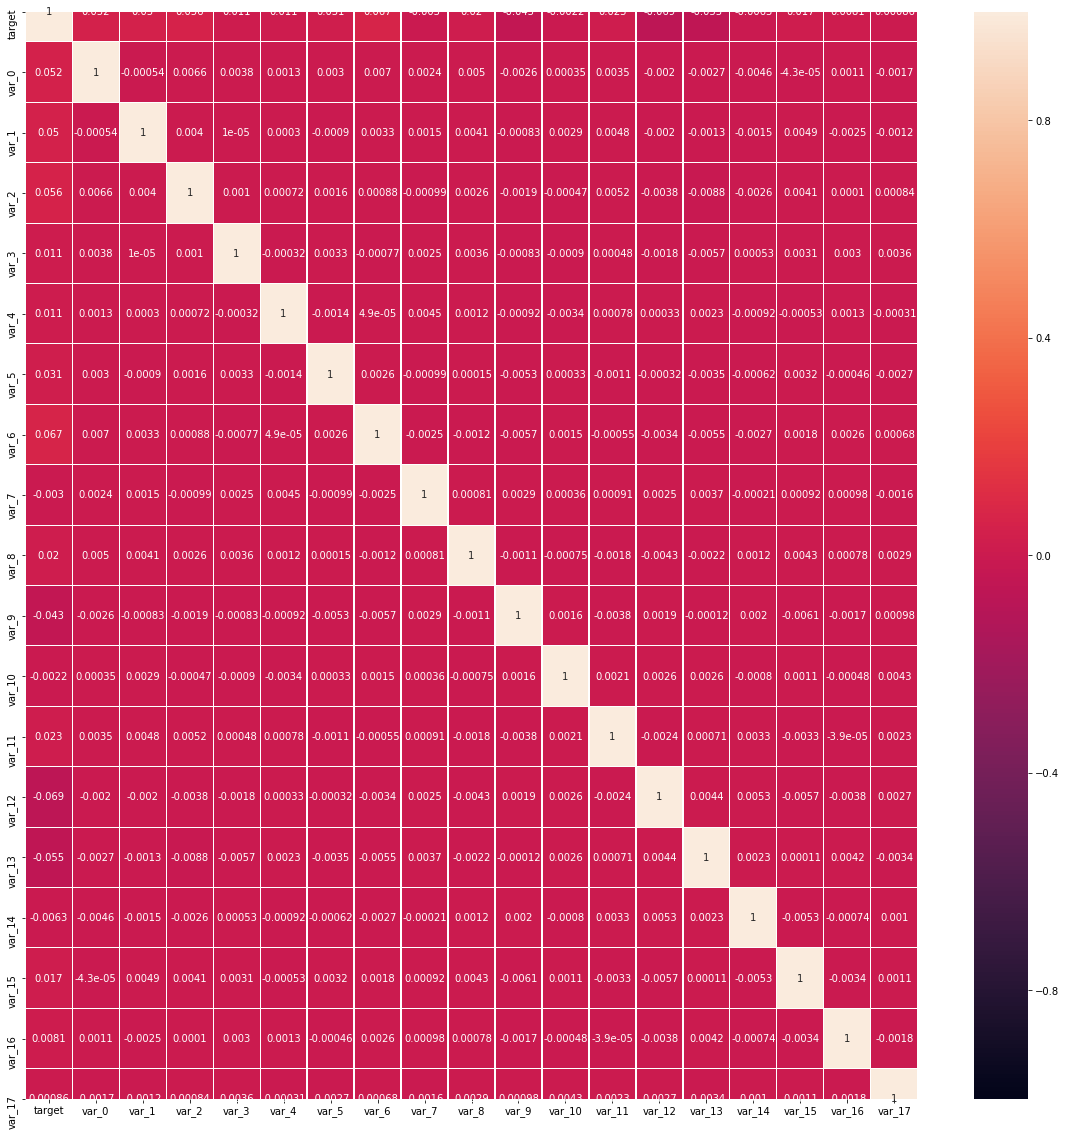

In [25]:
# Set the matplotlib figure 
fig, ax=plt.subplots(figsize=(20,20))

# Generate a custom diverging colormap
Cmap=sns.diverging_palette(200,10,as_cmap=True)

# Draw the heatmap
_= sns.heatmap(corr,  ax=ax, annot=True,   vmin=-1, linewidths=0.1)

# Saving the plot
plt.savefig('Heat_Map_Correlation_Matrix.png')

# Feature Selection

Feature selection is the process of selection the features, which are more relevent for our model and not carring unnecessary noise to final model. Also it can help in giving idea about the new feature(Drived Features). I will use RandomForest for it, it will help us to detect the features importance.

In [26]:
Random_Forest = RandomForestClassifier( max_depth=10, verbose=3, n_estimators=20)
parameters = {'n_estimators': [120, 100], 'max_depth':[3,5,]}
grid = GridSearchCV(Random_Forest, parameters, cv=3, n_jobs=-1, verbose=3, scoring=make_scorer(roc_auc_score))

In [27]:
Train_Data_Feature_Selection=train_data
grid.fit(Train_Data_Feature_Selection.drop(["target",'ID_code'], axis=1).values, Train_Data_Feature_Selection.target.values)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed: 12.0min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 13.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 120


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


building tree 2 of 120


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


building tree 3 of 120
building tree 4 of 120
building tree 5 of 120
building tree 6 of 120
building tree 7 of 120
building tree 8 of 120
building tree 9 of 120
building tree 10 of 120
building tree 11 of 120
building tree 12 of 120
building tree 13 of 120
building tree 14 of 120
building tree 15 of 120
building tree 16 of 120
building tree 17 of 120
building tree 18 of 120
building tree 19 of 120
building tree 20 of 120
building tree 21 of 120
building tree 22 of 120
building tree 23 of 120
building tree 24 of 120
building tree 25 of 120
building tree 26 of 120
building tree 27 of 120
building tree 28 of 120
building tree 29 of 120
building tree 30 of 120
building tree 31 of 120
building tree 32 of 120
building tree 33 of 120
building tree 34 of 120
building tree 35 of 120
building tree 36 of 120
building tree 37 of 120
building tree 38 of 120
building tree 39 of 120
building tree 40 of 120
building tree 41 of 120
building tree 42 of 120
building tree 43 of 120
building tree 44 of 120

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=20, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=3,
                                              warm_start=False),
             iid='warn

In [28]:
grid.best_score_

0.5

Top 10 features

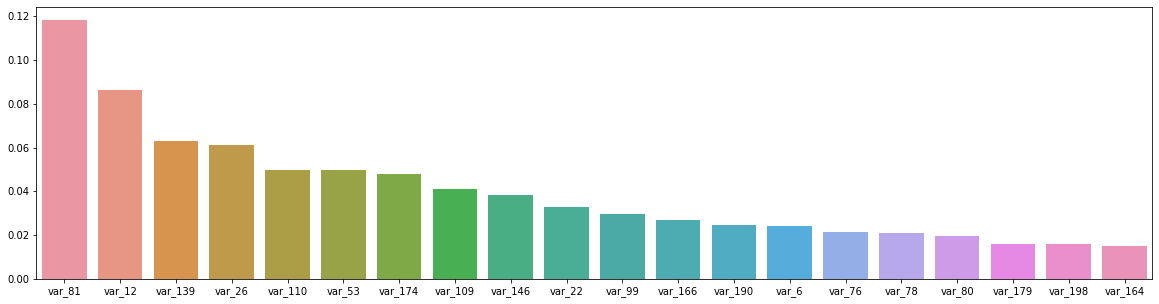

In [29]:
n_top = 20
importance_feature_df=grid.best_estimator_.feature_importances_
idx=np.argsort(importance_feature_df)[::-1][0:n_top]
features_name=Train_Data_Feature_Selection.drop(["target",'ID_code'], axis=1).columns.values

plt.figure(figsize=(20,5))
sns.barplot(x=features_name[idx], y=importance_feature_df[idx],n_boot=10)

# Decision Tree

In [30]:
# Splitting the train and test dataset
X=Train_Data_Feature_Selection.drop(["target",'ID_code'], axis=1)
Y=Train_Data_Feature_Selection.target

x_train,x_test,y_train, y_test = train_test_split(X, Y, random_state=41)

In [31]:
#Decision Tree
classification = tree.DecisionTreeClassifier(criterion='entropy').fit(x_train,y_train)

In [32]:
# Prediction of new test cases 
Decision_Tree_Predictions = classification.predict(x_test)

In [33]:
Decision_Tree_Predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
#Building Confusion Matrix
CM = confusion_matrix(y_test,Decision_Tree_Predictions)

CM = pd.crosstab(y_test,Decision_Tree_Predictions)

In [35]:
# Let us save TP,TN,FP,FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [36]:
TN

40725

In [37]:
# False Negative Rate : 79.50%
(FN * 100)/(FN + TP)

79.46375372393247

# Comparing the Accuracy vs Precision-Recall with imbalanced dataset for Decision Tree

In [38]:
Accuracy_dt = accuracy_score(y_test,Decision_Tree_Predictions)*100

In [39]:
print('Accuracy : %3f' %Accuracy_dt)

Accuracy : 83.518000


In [40]:
print(classification_report(y_test, Decision_Tree_Predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     44965
           1       0.20      0.21      0.20      5035

    accuracy                           0.84     50000
   macro avg       0.55      0.56      0.55     50000
weighted avg       0.84      0.84      0.84     50000



# ROC Curve vs. Precision-Recall Curve with imbalenced data for Decision Tree

In [41]:
probability = classification.predict_proba(x_test)
probability = probability[:, 1]

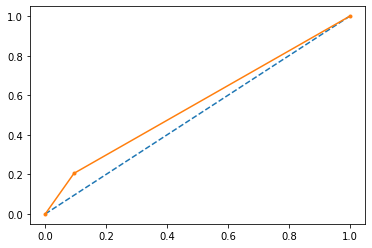

AUC: 0.556


In [42]:
fpr, tpr, thresholds = roc_curve(y_test, probability)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()
auc_score = roc_auc_score(y_test, probability)
print('AUC: %.3f' % auc_score)

# Precision-Recall curve

In [43]:
precision, recall, thresholds = precision_recall_curve(y_test, probability)
auc_score = auc(recall, precision)

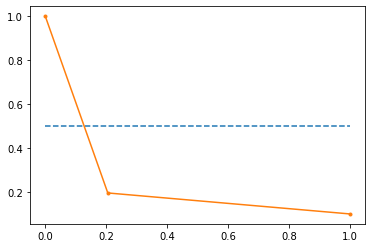

AUC: 0.241


In [44]:
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()
print('AUC: %.3f' % auc_score)

# Random Forest


In [45]:
Random_Forest_Model_1 = RandomForestClassifier(n_estimators = 100,bootstrap = True,max_features = 'sqrt').fit(x_train,y_train)

In [46]:
#Actual Class Predictions
Random_Forest_Model_Predictions = Random_Forest_Model_1.predict(x_test)

In [47]:
Random_Forest_Model_Predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
#Building Confusion Matrix
CM = confusion_matrix(y_test,Random_Forest_Model_Predictions)

In [49]:
# Checkimh the confusion Matrix[CM] :
CM

array([[44965,     0],
       [ 5034,     1]], dtype=int64)

In [50]:
# False Negative Rate : 
(FN * 100)/(FN + TP)

79.46375372393247

# Comparing the Accuracy vs Precision-Recall with imbalanced dataset for Random Forest Model 1

In [51]:
Accuracy_RF1 = accuracy_score(y_test,Random_Forest_Model_Predictions)*100

In [52]:
print('Accuracy Random Forest Model 1 : %3f' %Accuracy_RF1)

Accuracy Random Forest Model 1 : 89.932000


In [53]:
print(classification_report(y_test, Random_Forest_Model_Predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     44965
           1       1.00      0.00      0.00      5035

    accuracy                           0.90     50000
   macro avg       0.95      0.50      0.47     50000
weighted avg       0.91      0.90      0.85     50000



# ROC Curve vs. Precision-Recall Curve with imbalenced data for Random Forest Model 1

In [54]:
probability_rf1 = classification.predict_proba(x_test)
probability_rf1 = probability_rf1[:, 1]

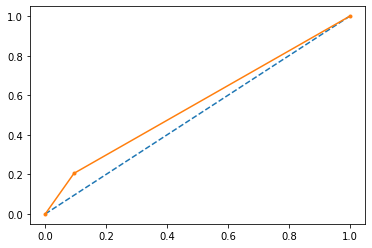

AUC: 0.556


In [55]:
fpr, tpr, thresholds = roc_curve(y_test, probability_rf1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()
auc_score = roc_auc_score(y_test, probability_rf1)
print('AUC: %.3f' % auc_score)

# Precision-Recall curve

In [56]:
precision, recall, thresholds = precision_recall_curve(y_test, probability_rf1)
auc_score = auc(recall, precision)

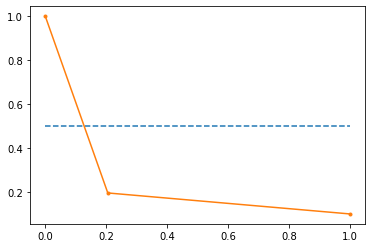

AUC: 0.241


In [57]:
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()
print('AUC: %.3f' % auc_score)

# Random Forest Model 2

In [58]:
Random_Forest_Model_2 = RandomForestClassifier(n_estimators = 500,bootstrap = True,max_features = 'sqrt').fit(x_train,y_train)

In [59]:
Random_Forest_Model_Predictions_2 = Random_Forest_Model_2.predict(x_test)

In [60]:
Random_Forest_Model_Predictions_2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
#Building Confusion Matrix
CM = confusion_matrix(y_test,Random_Forest_Model_Predictions_2)

In [62]:
# Checkimh the confusion Matrix[CM] :
CM

array([[44965,     0],
       [ 5035,     0]], dtype=int64)

In [63]:
# False Negative Rate : 
(FN * 100)/(FN + TP)

79.46375372393247

# Comparing the Accuracy vs Precision-Recall with imbalanced dataset for Random Forest Model 2

In [64]:
Accuracy_RF2 = accuracy_score(y_test,Random_Forest_Model_Predictions_2)*100

In [65]:
print('Accuracy Random Forest Model 2 : %3f' %Accuracy_RF2)

Accuracy Random Forest Model 1 : 89.930000


In [66]:
print(classification_report(y_test, Random_Forest_Model_Predictions_2))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     44965
           1       0.00      0.00      0.00      5035

    accuracy                           0.90     50000
   macro avg       0.45      0.50      0.47     50000
weighted avg       0.81      0.90      0.85     50000



# ROC Curve vs. Precision-Recall Curve with imbalenced data for Random Forest Model 2

In [67]:
probability_rf2 = classification.predict_proba(x_test)
probability_rf2 = probability_rf2[:, 1]

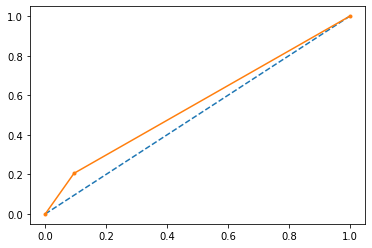

AUC: 0.556


In [68]:
fpr, tpr, thresholds = roc_curve(y_test, probability_rf2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()
auc_score = roc_auc_score(y_test, probability_rf2)
print('AUC: %.3f' % auc_score)

# Precision-Recall curve

In [69]:
precision, recall, thresholds = precision_recall_curve(y_test, probability_rf2)
auc_score = auc(recall, precision)

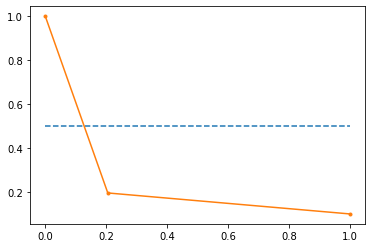

AUC: 0.241


In [70]:
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()
print('AUC: %.3f' % auc_score)

# Logistic Regression Model

In [71]:
Model = LogisticRegression()

In [72]:
Model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
predictions = Model.predict(x_test)

# Comparing the Accuracy vs. Precision-Recall with imbalanced data for Logistic Regression

In [75]:
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.915


In [76]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     44965
           1       0.70      0.27      0.39      5035

    accuracy                           0.91     50000
   macro avg       0.81      0.63      0.67     50000
weighted avg       0.90      0.91      0.90     50000



# ROC Curve vs. Precision-Recall Curve with imbalenced data for Logistic Regression

In [78]:
probs = Model.predict_proba(x_test)
probs = probs[:, 1]

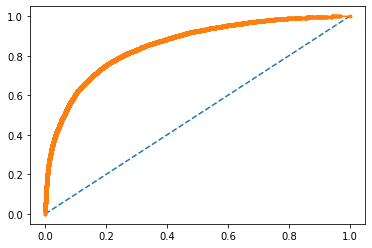

AUC: 0.856


In [79]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()
auc_score = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_score)

# Precision-Recall curve

In [80]:
precision, recall, thresholds = precision_recall_curve(y_test, probs)
auc_score = auc(recall, precision)

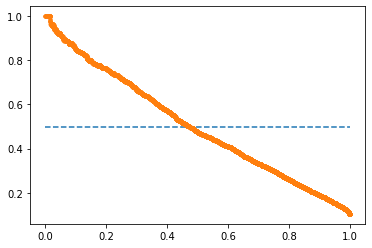

AUC: 0.507


In [81]:
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()
print('AUC: %.3f' % auc_score)

# Naive Bayes Model


In [83]:
# Naive Bayes Implementation
NB_Model = GaussianNB().fit(x_train,y_train)

In [84]:
# Predict Test Cases 
NB_Predictions = NB_Model.predict(x_test)

In [85]:
#Actual Predictions
NB_Predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Comparing the Accuracy vs. Precision-Recall with imbalanced data for Naive Bayes

In [111]:
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.915


In [112]:
#Classification Report
print(classification_report(y_test, NB_Predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     44965
           1       0.71      0.36      0.48      5035

    accuracy                           0.92     50000
   macro avg       0.82      0.67      0.72     50000
weighted avg       0.91      0.92      0.91     50000



# ROC Curve vs. Precision-Recall Curve with imbalenced data for Logistic Regression

In [106]:
probs = NB_Model.predict_proba(x_test)
probs = probs[:, 1]

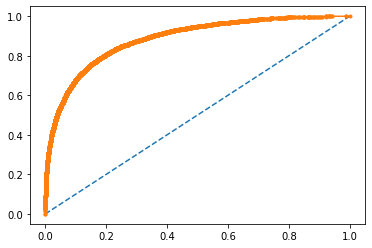

AUC: 0.885


In [107]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()
auc_score = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_score)

# Precision-Recall curve

In [109]:
precision, recall, thresholds = precision_recall_curve(y_test, probs)
auc_score = auc(recall, precision)

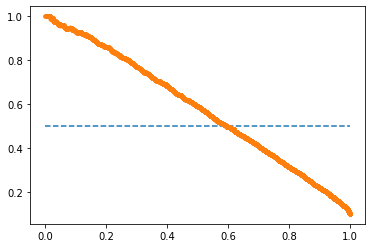

AUC: 0.584


In [110]:
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()
print('AUC: %.3f' % auc_score)

In [101]:
# Creating CSV Output file:
# Predictions 
Prediction_Values = predictions

In [102]:
prediction_results = pd.DataFrame(Prediction_Values,columns = ['Predictions']).to_csv('prediction_LG.csv')